In [49]:
#Import libraries
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft



all with f=200 (6)
low power mode = 1

In [50]:
data_bh = np.loadtxt('data/bruit_humain.log', skiprows=1, delimiter='\t')
data_bt = np.loadtxt('data/bruit_table.log', skiprows=1, delimiter='\t')
data_lp = np.loadtxt('data/fulle_noise_intern.log', skiprows=1, delimiter='\t')
data_lp4 = np.loadtxt('data/lp_odr4.log', skiprows=1, delimiter='\t')
data_hp = np.loadtxt('data/high_perf.log', skiprows=1, delimiter='\t')

(105, 3)


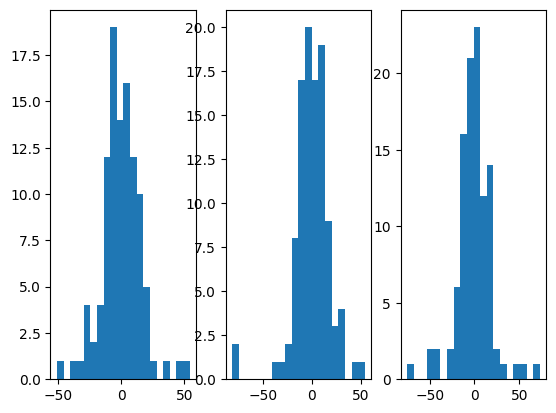

In [51]:
noise_bh = data_bh - np.mean(data_bh,axis=0)
noise_bh = data_bt - np.mean(data_bt,axis=0)
noise_bh = data_lp - np.mean(data_lp,axis=0)
print(noise_bh.shape)


fig, axs = plt.subplots(nrows=1, ncols=3)
axs[0].hist(noise_bh[:,0],bins=20)
axs[1].hist(noise_bh[:,1],bins=20)
axs[2].hist(noise_bh[:,2],bins=20)
plt.show()

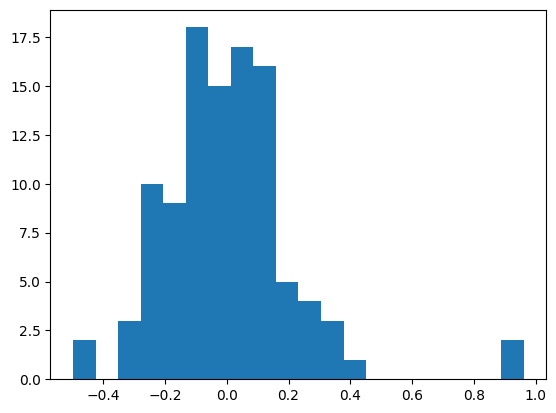

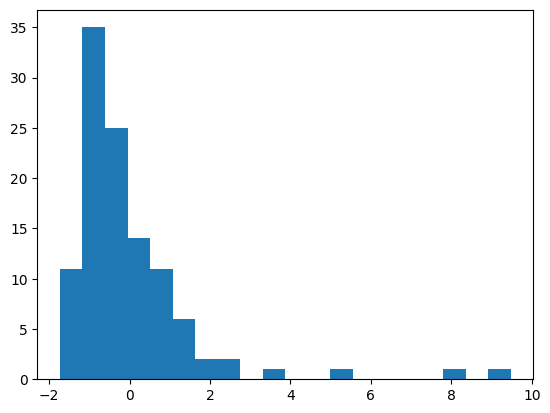

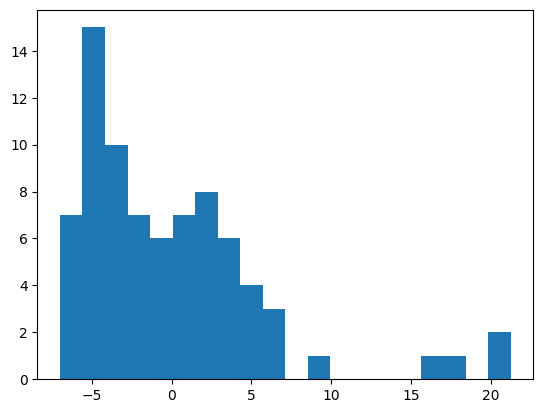

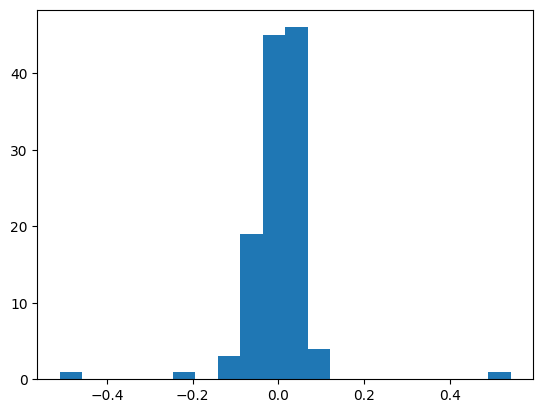

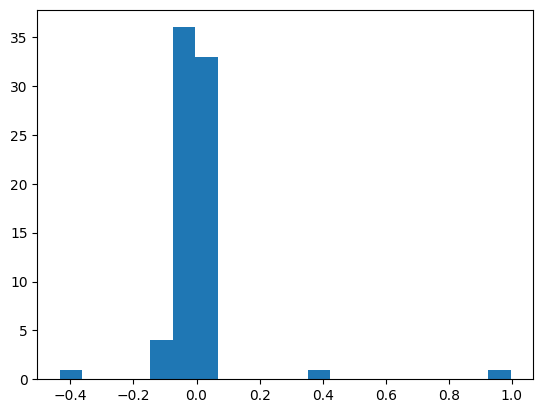

no env :0.021153453777852424	 var : 0.21675839939165584
no env :0.015833224007890303	 var : 0.13803084680167174
1.3360168319042822 1.5703620198976465
bruit humain :0.15282378416526263	 var : 1.6028293704337295
bruit table :0.6685663100646518	 var : 5.904617773774202
high perf :0.007570299971107283	 var : 0.08292848122512332


In [53]:
a = 360/(2*np.pi)
theta = (np.arctan((data_lp[:,0]**2+data_lp[:,1]**2)**0.5/data_lp[:,2]))*a
plt.hist(theta-np.mean(theta),bins=20)
noise_lp = (np.sum((theta-np.mean(theta))**2))**0.5/len(theta)
var_lp = np.var(theta-np.mean(theta))

plt.show()
theta = (np.arctan((data_bh[:,0]**2+data_bh[:,1]**2)**0.5/data_bh[:,2]))*a
plt.hist(theta-np.mean(theta),bins=20)
plt.show()
noise_bh = (np.sum((theta-np.mean(theta))**2))**0.5/len(theta)
var_bh = np.var(theta-np.mean(theta))

theta = (np.arctan((data_bt[:,0]**2+data_bt[:,1]**2)**0.5/data_bt[:,2]))*a
plt.hist(theta-np.mean(theta),bins=20)
plt.show()
noise_bt = (np.sum((theta-np.mean(theta))**2))**0.5/len(theta)
var_bt = np.var(theta-np.mean(theta))

theta = (np.arctan((data_hp[:,0]**2+data_hp[:,1]**2)**0.5/data_hp[:,2]))*a
plt.hist(theta-np.mean(theta),bins=20)
plt.show()
noise_hp = (np.sum((theta-np.mean(theta))**2))**0.5/len(theta)
var_hp = np.var(theta-np.mean(theta))

theta = (np.arctan((data_lp4[:,0]**2+data_lp4[:,1]**2)**0.5/data_lp4[:,2]))*a
plt.hist(theta-np.mean(theta),bins=20)
plt.show()
noise_lp4 = (np.sum((theta-np.mean(theta))**2))**0.5/len(theta)
var_lp4 = np.var(theta-np.mean(theta))

print(f"no env :{noise_lp}\t var : {var_lp**0.5}")
print(f"no env :{noise_lp4}\t var : {var_lp4**0.5}")
print(noise_lp/noise_lp4, (var_lp**0.5)/(var_lp4**0.5))
print(f"bruit humain :{noise_bh}\t var : {var_bh**0.5}")
print(f"bruit table :{noise_bt}\t var : {var_bt**0.5}")
print(f"high perf :{noise_hp}\t var : {var_hp**0.5}")

## Transfert function

In [67]:
a0 = np.loadtxt('data/0.log', skiprows=1, delimiter='\t')
a45 = np.loadtxt('data/45.log', skiprows=1, delimiter='\t')
a675 = np.loadtxt('data/675.log', skiprows=1, delimiter='\t')
a90 = np.loadtxt('data/90.log', skiprows=1, delimiter='\t')
a135 = np.loadtxt('data/135.log', skiprows=1, delimiter='\t')
a180 = np.loadtxt('data/180.log', skiprows=1, delimiter='\t')

(3,)


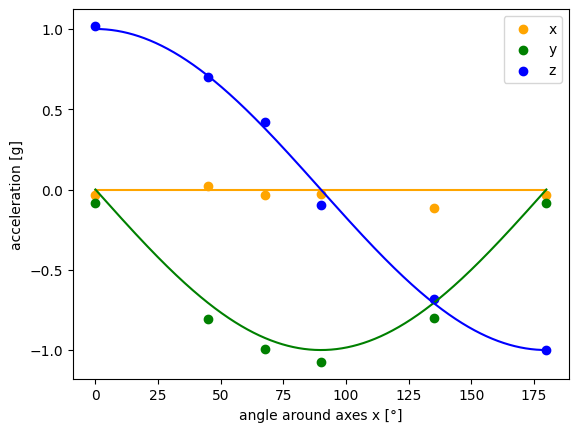

In [85]:
ma0 = np.mean(a0, axis = 0).T
ma45 = np.mean(a45, axis = 0).T
ma675 = np.mean(a675, axis = 0).T
ma90 = np.mean(a90, axis = 0).T
ma135 = np.mean(a135, axis = 0).T
ma180 = np.mean(a180, axis = 0).T
print(ma0.shape)
angle = [0,45,67.5,90,135,180]
acc = np.concatenate((ma0, ma45,ma675,ma90,ma135,ma180))
Amp= 2**12-1
abs = np.linspace(0,180,1000)
z = np.cos(abs/360*2*np.pi)
y = -np.sin(abs/360*2*np.pi)
x = np.zeros(1000)
plt.plot(abs, x , color ='orange')
plt.plot(abs, y , color ='green')
plt.plot(abs, z , color ='blue')
plt.scatter(angle, acc[::3]/Amp,label="x", color = 'orange')
plt.scatter(angle, acc[1::3]/Amp,label="y", color = 'green')
plt.scatter(angle, acc[2::3]/Amp,label="z", color = 'blue')
plt.ylabel("acceleration [g]")
plt.xlabel("angle around axes x [°]")
plt.legend()
plt.show()